In [1]:
# Load training data
import random 

from dataset import read_mathqapython, read_gsm8k

from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('EleutherAI/gpt-neo-125M')

import matplotlib.pyplot as plt

# Training Set

In [6]:
data = read_mathqapython('mathqapython_train.json')

# Print a few representative instances
idxs = random.sample(range(len(data)), 3)

for i in idxs: 
    instance = data[i]
    print(instance.text + '\n' + instance.code + '\n')

# if x = 1 - 3 t and y = 2 t - 3 , then for what value of t does x = y ? n0 = 1.0 n1 = 3.0 n2 = 2.0 n3 = 3.0
n0 = 1.0
n1 = 3.0
n2 = 2.0
n3 = 3.0
t0 = n0 + n3
t1 = n1 + n2
answer = t0 / t1

# a train running at the speed of 180 km / hr crosses a pole in 8 seconds . find the length of the train . n0 = 180.0 n1 = 8.0
n0 = 180.0
n1 = 8.0
t0 = n0 * 1000.0
t1 = t0 / 3600.0
answer = n1 * t1

# in a maths test , students were asked to find 5 / 16 of a certain number . one of the students by mistake found 5 / 6 th of that number and his answer was 50 more than the correct answer . find the number . n0 = 5.0 n1 = 16.0 n2 = 5.0 n3 = 6.0 n4 = 50.0
n0 = 5.0
n1 = 16.0
n2 = 5.0
n3 = 6.0
n4 = 50.0
t0 = n1 * n4
t1 = n0 * n1
t2 = n0 * n3
t3 = n3 * t0
t4 = t1 - t2
answer = t3 / t4



### Text + code lengths

In [7]:
# Look at lengths of combined text + code
full_lengths = [(len(tokenizer.encode(x.text + '\n' + x.code)), i) for i, x in enumerate(data)]

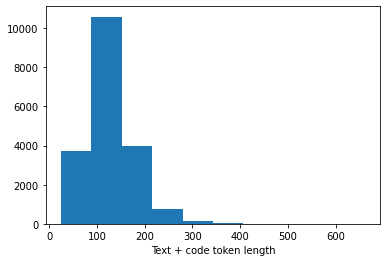

In [8]:
plt.hist([t[0] for t in full_lengths])
plt.xlabel('Text + code token length')
plt.show()

In [9]:
# Top 10 longest text + codes 
sorted_full_lengths = sorted(full_lengths, key = lambda t: -t[0])

print("Length of 10 longest text+codes")
for i in range(10): 
    print(sorted_full_lengths[i][0])

Length of 10 longest text+codes
662
614
527
523
486
470
465
412
411
398


In [24]:
# Out of curiosity, show the longest text + code
i = sorted_full_lengths[200][1]
x = data[i]

print(x.text + '\n' + x.code)

# in two alloys , copper and tin are related in the ratios of 4 : 1 and 1 : 3 . 10 kg of ist alloy , 16 kg of 2 nd alloy and some pure copper melted together . an alloy obtained in which the ratio of copper and tin was 3 : 2 . find the weight of the new alloy . n0 = 4.0 n1 = 1.0 n2 = 1.0 n3 = 3.0 n4 = 10.0 n5 = 16.0 n6 = 2.0 n7 = 3.0 n8 = 2.0
n0 = 4.0
n1 = 1.0
n2 = 1.0
n3 = 3.0
n4 = 10.0
n5 = 16.0
n6 = 2.0
n7 = 3.0
n8 = 2.0
t0 = n4 + n5
t1 = n0 + n1
t2 = n3 / n0
t3 = n4 / t1
t4 = n5 * t2
t5 = t3 + t4
t6 = n3 * t5
t7 = t6 / n6
t8 = t7 - t4
answer = t0 + t8


# Val + Test Set

In [18]:
evals = read_mathqapython("mathqapython_dev.json") + read_mathqapython("mathqapython_test.json")

### Code lengths

In [29]:
code_lengths = [(len(tokenizer.encode(x.code)), i) for i, x in enumerate(evals)]

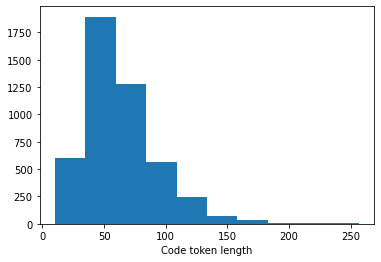

In [30]:
plt.hist([t[0] for t in code_lengths])
plt.xlabel('Code token length')
plt.show()

In [31]:
# Top 10 longest codes 
sorted_code_lengths = sorted(code_lengths, key = lambda t: -t[0])

print("Length of 10 longest text+codes")
for i in range(10): 
    print(sorted_code_lengths[i][0])

Length of 10 longest text+codes
257
253
253
251
234
222
222
221
215
211


In [35]:
# Out of curiosity, show the longest code
idx = sorted_code_lengths[0][1]
ex = evals[idx]

print(ex.text + '\n' + ex.code)
len(tokenizer.encode(ex.code))

# assume that f ( 1 ) = 0 and f ( m + n ) = f ( m ) + f ( n ) + 4 ( 9 mn - 1 ) . for all natural numbers ( integers > 0 ) m and n . what is the value of f ( 17 ) ? n0 = 1.0 n1 = 0.0 n2 = 4.0 n3 = 9.0 n4 = 1.0 n5 = 0.0 n6 = 17.0
n0 = 1.0
n1 = 0.0
n2 = 4.0
n3 = 9.0
n4 = 1.0
n5 = 0.0
n6 = 17.0
t0 = 1.0 + 4.0
t1 = 2.0 * 4.0
t2 = n2 * 10.0
t3 = n6 * 4.0
t4 = t2 + 3.0
t5 = n3 + t3
t6 = n2 * t1
t7 = t0 * 100.0
t8 = t6 + t6
t9 = t6 + 3.0
t10 = t4 + 100.0
t11 = t5 - 2.0
t12 = t7 + t11
t13 = n2 * t9
t14 = n2 * t10
t15 = t8 + t13
t16 = t12 * 4.0
t17 = t15 + t15
t18 = t17 + t14
t19 = t18 + t18
t20 = t19 + t16
answer = t20 + t14


257

# GSM8k

In [2]:
train_data = read_gsm8k("gsm8k/gsm8k_train.jsonl")
print(train_data[0])

Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?

72
Natalia sold 48/2 = <<48/2=24>>24 clips in May.
Natalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.
#### 72


In [25]:
longest = sorted(train_data, key = lambda x: -x.reasoning.count("\n")+1)

for thing in longest[4000:4010]: 
    print(thing)

Aubrey has a deck of cards with 52 cards in it. She then adds two additional cards to the deck. If she splits the deck evenly among herself and two other players, how many cards does each player have?

18
The deck has 54 cards because 52 + 2 = <<52+2=54>>54
There are three players because 1 + 2 = <<1+2=3>>3
Each player gets 18 cards because 54 / 3 = <<54/3=18>>18
#### 18
There were 50 racers in a bicycle charity race at the beginning of the race. After 20 minutes, 30 more racers joined the race. The total number of racers doubled after another 30 minutes. If at the end of the race only 130 people finished the race, what's the total number of people who dropped before finishing the race?

30
At the start, there were 50 racers, who were joined by 30 more racers, thus 50+30 =<<50+30=80>>80 racers
After 30 more minutes, the number of racers doubled, totaling 80*2 = 160 racers.
If the number of racers who finished is 130, the 160-130 = 30 racers dropped before finishing.
#### 30
Haley has 5